Initialization

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os

from numpy.random import RandomState

#Creating directories
raw_data_dir = r"E:\AIML_Project\data\raw"
processed_dir = r"E:\AIML_Project\results\outputs"
eda_ev_dir = r"E:\AIML_Project\results\eda_visualizations"

In [2]:
#Loading the dataset

df = pd.read_csv("E:/AIML_Project/data/raw/adult.data", header=None)

display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Formatting - Assigned to IT24102085

In [3]:
#Defining the column names

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

print("Column names defined: ", columns)
print(f"Total columns: {len(columns)}")

Column names defined:  ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Total columns: 15


In [4]:
#Path to train file
train_path = os.path.join(raw_data_dir, 'adult.data')
df_train = pd.read_csv(train_path, names=columns, header=None, skipinitialspace=True)

#Dsiplaying basic info
print("Training data shape:", df_train.shape)
print("\nFirst 5 rows:")
print(df_train.head())
print("\nColumn names:")
print(df_train.columns.tolist())

Training data shape: (32561, 15)

First 5 rows:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=

In [5]:
# Path to test file
test_path = os.path.join(raw_data_dir, 'adult.test')
df_test = pd.read_csv(test_path, names=columns, header=None, skiprows=1, skipinitialspace=True)

# The last column in test might have a trailing '.' — clean it
df_test['income'] = df_test['income'].str.rstrip('.')

# Display basic info
print("Test data shape:", df_test.shape)
print("\nFirst 5 rows:")
print(df_test.head())
print("\nColumn names:")
print(df_test.columns.tolist())

Test data shape: (16281, 15)

First 5 rows:
   age  workclass  fnlwgt     education  education_num      marital_status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital_gain  capital_loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hou

In [6]:
# Quick checks
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

# Check for any mismatches
assert df_train.columns.equals(df_test.columns), "Column names mismatch between train/test!"
print("\nColumn names consistent across train/test.")

# Save preprocessed CSVs
processed_dir = r"E:\AIML_Project\results\outputs"
os.makedirs(processed_dir, exist_ok=True)
df_train.to_csv(os.path.join(processed_dir, 'IT24102085_Data_Formatting_train.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT24102085_Data_Formatting_test.csv'), index=False)
print("Saved named datasets to processed directory.")

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries,

Data Cleaning - Assigned to IT24102036

In [7]:
#Loading data from the adult_train_no_fnlwgt and adult_test_no_fnlwgt

df_train = pd.read_csv(os.path.join(processed_dir, 'IT24102085_Data_Formatting_train.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT24102085_Data_Formatting_test.csv'))

#Displaying shapes and null counts before cleaning
print("Before dropping rows with nulls:")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nMissing value counts (train):")
print(df_train.isna().sum())
print("\nMissing value counts (test):")
print(df_test.isna().sum())

#Replacing '?' with NaN in both datasets
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

print("\nAfter replacing '?' with NaN, missing value counts (train):")
print(df_train.isna().sum())
print("\nAfter replacing '?' with NaN, missing value counts (test):")
print(df_test.isna().sum())

#Dropping rows with NaN values
df_train = df_train.dropna()
df_test = df_test.dropna()

# Verifying shapes after dropping
print("\nAfter dropping rows with nulls:")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nRemaining missing values (train):")
print(df_train.isna().sum().sum())
print("Remaining missing values (test):")
print(df_test.isna().sum().sum())

# Saving cleaned datasets
processed_dir = r"E:\AIML_Project\results\outputs"
df_train.to_csv(os.path.join(processed_dir, 'IT_24102036_cleaning_train.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102036_cleaning_test.csv'), index=False)
print("\nSaved cleaned datasets to processed directory.")

Before dropping rows with nulls:
Training data shape: (32561, 15)
Test data shape: (16281, 15)

Missing value counts (train):
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing value counts (test):
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

After replacing '?' with NaN, missing value counts (train):
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1

Dimentional deduction - Assigned to IT24102055


In [8]:
# Load from previous (cleaning)
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102036_cleaning_train.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102036_cleaning_test.csv'))

#Dropping the 'fnlwgt' column
print("Before dropping 'fnlwgt':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

df_train = df_train.drop(columns=['fnlwgt'])
df_test = df_test.drop(columns=['fnlwgt'])

print("After dropping 'fnlwgt':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

print("\nTraining columns:", df_train.columns.tolist())
print("Test columns:", df_test.columns.tolist())

# Save after all drops
processed_dir = r"E:\AIML_Project\results\outputs"
df_train.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_train(01).csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(01).csv'), index=False)
print("Saved reduced datasets to processed directory.")

Before dropping 'fnlwgt':
Training data shape: (30162, 15)
Test data shape: (15060, 15)
After dropping 'fnlwgt':
Training data shape: (30162, 14)
Test data shape: (15060, 14)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Test columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Saved reduced datasets to processed directory.


In [9]:
#Negative impact of "capital gain" and "capital loss" columns
#Reason:
# Calculate percentage of zeros
print("Training set:")
print("Capital Gain Zeros:", (df_train['capital_gain'] == 0).mean() * 100, "%")
print("Capital Loss Zeros:", (df_train['capital_loss'] == 0).mean() * 100, "%")
print("\nTest set:")
print("Capital Gain Zeros:", (df_test['capital_gain'] == 0).mean() * 100, "%")
print("Capital Loss Zeros:", (df_test['capital_loss'] == 0).mean() * 100, "%")

#In these two columns, there are percentages of 91.585% and 95.268% for capital gain and capital columns in the training set respectfully. And also 91.686% and 95.265% in test set respectfully. This affects the accuracy of the prediction that the trained model is going to make

Training set:
Capital Gain Zeros: 91.58543863139049 %
Capital Loss Zeros: 95.2688813739142 %

Test set:
Capital Gain Zeros: 91.68658698539177 %
Capital Loss Zeros: 95.26560424966799 %


In [10]:
#Dropping "capital gain" and "capital loss" columns
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_train(01).csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(01).csv'))

# Displaying shapes before dropping
print("Before dropping 'capital_gain' and 'capital_loss':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

# Drop the 'capital_gain' and 'capital_loss' columns
df_train = df_train.drop(columns=['capital_gain', 'capital_loss'])
df_test = df_test.drop(columns=['capital_gain', 'capital_loss'])

# Displaying shapes after dropping
print("After dropping 'capital_gain' and 'capital_loss':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

# Confirm column consistency
assert df_train.columns.equals(df_test.columns)

# Save updated datasets
processed_dir = r"E:\AIML_Project\results\outputs"
df_train.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_train(02).csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(02).csv'), index=False)
print("\nSaved datasets without 'capital_gain' and 'capital_loss' to processed directory.")

Before dropping 'capital_gain' and 'capital_loss':
Training data shape: (30162, 14)
Test data shape: (15060, 14)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
After dropping 'capital_gain' and 'capital_loss':
Training data shape: (30162, 12)
Test data shape: (15060, 12)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']

Saved datasets without 'capital_gain' and 'capital_loss' to processed directory.


In [11]:
#Dropping 'education' column: education_num is a label encoded column of education

df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_train(02).csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(02).csv'))

#Displaying shapes and columns before dropping
print("Before dropping 'education':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

#Dropping the 'education' column
df_train = df_train.drop(columns=['education'])
df_test = df_test.drop(columns=['education'])

#Displaying shapes and columns after dropping
print("After dropping 'education':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

#Confirming column consistency
assert df_train.columns.equals(df_test.columns), "Column names mismatch between train/test!"

#Saving updated datasets
processed_dir = r"E:\AIML_Project\results\outputs"
df_train.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(03).csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(03).csv'), index=False)
print("\nSaved datasets without 'education' to processed directory.")

Before dropping 'education':
Training data shape: (30162, 12)
Test data shape: (15060, 12)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']
After dropping 'education':
Training data shape: (30162, 11)
Test data shape: (15060, 11)

Training columns: ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']

Saved datasets without 'education' to processed directory.


Maintaining 50-50 balance - Assigned to IT24102123

In [12]:
#Maintaining the 50-50 balance between <50k and >=50k

# Load from previous (reduction)
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(03).csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102055_reduction_test(03).csv'))

# Display initial class distribution
print("Before balancing:")
print("Training set class distribution:\n", df_train['income'].value_counts())
print("\nTest set class distribution:\n", df_test['income'].value_counts())

# Separate classes for training set
train_leq50k = df_train[df_train['income'] == '<=50K']
train_gt50k = df_train[df_train['income'] == '>50K']

# Get the number of >50K instances (minority class)
n_gt50k_train = len(train_gt50k)

# Randomly sample <=50K to match >50K count
train_leq50k_balanced = train_leq50k.sample(n=n_gt50k_train, random_state=42)

# Combine balanced classes
df_train_balanced = pd.concat([train_leq50k_balanced, train_gt50k], axis=0).sample(frac=1, random_state=42)

# Repeat for test set
test_leq50k = df_test[df_test['income'] == '<=50K']
test_gt50k = df_test[df_test['income'] == '>50K']
n_gt50k_test = len(test_gt50k)
test_leq50k_balanced = test_leq50k.sample(n=n_gt50k_test, random_state=42)
df_test_balanced = pd.concat([test_leq50k_balanced, test_gt50k], axis=0).sample(frac=1, random_state=42)

# Verify shapes and class distribution
print("\nAfter balancing:")
print("Training set shape:", df_train_balanced.shape)
print("Training set class distribution:\n", df_train_balanced['income'].value_counts())
print("\nTest set shape:", df_test_balanced.shape)
print("Test set class distribution:\n", df_test_balanced['income'].value_counts())

# Confirm column consistency
assert df_train_balanced.columns.equals(df_test_balanced.columns), "Column names mismatch between train/test!"

# Save balanced datasets
df_train_balanced.to_csv(os.path.join(processed_dir, 'IT_24102123_balanced_train.csv'), index=False)
df_test_balanced.to_csv(os.path.join(processed_dir, 'IT_24102123_balanced_test.csv'), index=False)
print("\nSaved balanced datasets to processed directory.")

Before balancing:
Training set class distribution:
 income
<=50K    11360
>50K      3700
Name: count, dtype: int64

Test set class distribution:
 income
<=50K    11360
>50K      3700
Name: count, dtype: int64

After balancing:
Training set shape: (7400, 11)
Training set class distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

Test set shape: (7400, 11)
Test set class distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

Saved balanced datasets to processed directory.


Encoding - Assigned to IT24102121

In [13]:
#Binary Encoding

# Load from previous (balanced)
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102123_balanced_train.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102123_balanced_test.csv'))

#Displaying initial income distribution
print("Before binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())

# Binary encode the income column ('<=50K' -> 0, '>50K' -> 1)
df_train['income'] = df_train['income'].map({'<=50K': 0, '>50K': 1})
df_test['income'] = df_test['income'].map({'<=50K': 0, '>50K': 1})

# Verify encoding and class balance
print("\nAfter binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())
print("\nTraining dtypes:\n", df_train.dtypes)

# Save datasets with encoded income
df_train.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(01).csv'), index=False)
print("\nSaved datasets with encoded income to processed directory.")

Before binary encoding:
Training set income distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

Test set income distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

After binary encoding:
Training set income distribution:
 income
1    3700
0    3700
Name: count, dtype: int64

Test set income distribution:
 income
1    3700
0    3700
Name: count, dtype: int64

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

Saved datasets with encoded income to processed directory.


All numerical columns found in dataset.

NaN counts per column:
age               0
education_num     0
hours_per_week    0
income            0
dtype: int64

Variance per column:
age               160.411154
education_num       6.731307
hours_per_week    141.075247
income              0.250034
dtype: float64

Correlation matrix shape: (4, 4)


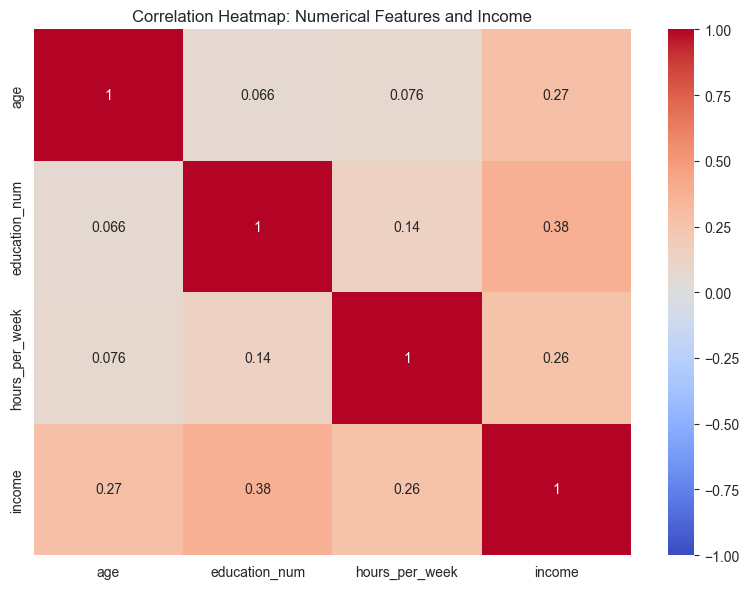

 Heatmap for numerical features saved to E:\AIML_Project\results\eda_visualizations\heatmap_numerical.png.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the encoded training dataset
df_train_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'))

# Define numerical columns to include
numerical_cols = ['age', 'education_num', 'hours_per_week', 'income']

# Verify columns exist and select data
missing_cols = [col for col in numerical_cols if col not in df_train_encoded.columns]
if missing_cols:
    print(f"Warning: Missing columns in dataset: {missing_cols}")
else:
    print("All numerical columns found in dataset.")

df_numerical = df_train_encoded[numerical_cols]

# Check for NaN values or zero variance
print("\nNaN counts per column:")
print(df_numerical.isna().sum())
print("\nVariance per column:")
print(df_numerical.var())

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Verify matrix shape
print("\nCorrelation matrix shape:", corr_matrix.shape)

# Create heatmap with explicit axis limits
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap: Numerical Features and Income')
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(eda_ev_dir, 'heatmap_numerical.png')
plt.savefig(heatmap_path)
plt.show()
print(f" Heatmap for numerical features saved to {heatmap_path}.")

In [15]:
#One hot Encoding

#All the nominal column are selected to do one-hot-encoding

# Load the datasets with encoded income
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(01).csv'))

# Display initial shapes and dtypes
print("Before one-hot encoding:")
print("Training set shape:", df_train.shape)
print("Test set shape:", df_test.shape)
print("\nTraining dtypes:\n", df_train.dtypes)

# Define categorical columns to one-hot encode
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Apply one-hot encoding to categorical columns
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Convert boolean values to integers (True -> 1, False -> 0)
for column in df_train_encoded.columns:
    if df_train_encoded[column].dtype == 'bool':
        df_train_encoded[column] = df_train_encoded[column].astype(int)
for column in df_test_encoded.columns:
    if df_test_encoded[column].dtype == 'bool':
        df_test_encoded[column] = df_test_encoded[column].astype(int)

# Align test set columns to train set, filling missing with 0
train_columns = df_train_encoded.columns
df_test_encoded = df_test_encoded.reindex(columns=train_columns, fill_value=0)

# Verify shapes and dtypes after encoding
print("\nAfter one-hot encoding:")
print("Training set shape:", df_train_encoded.shape)
print("Test set shape:", df_test_encoded.shape)
print("\nTraining dtypes:\n", df_train_encoded.dtypes)

# Check for non-numeric columns
non_numeric_cols = df_train_encoded.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\nWarning: Non-numeric columns remain in training set:", non_numeric_cols.tolist())
else:
    print("\nAll columns in training set are numeric.")

# Confirm class balance
print("\nTraining set income distribution:\n", df_train_encoded['income'].value_counts())
print("Test set income distribution:\n", df_test_encoded['income'].value_counts())

# Save fully encoded datasets
df_train_encoded.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(02).csv'), index=False)
df_test_encoded.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(02).csv'), index=False)
print("\nSaved fully encoded datasets to processed directory.")

Before one-hot encoding:
Training set shape: (7400, 11)
Test set shape: (7400, 11)

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

After one-hot encoding:
Training set shape: (7400, 78)
Test set shape: (7400, 78)

Training dtypes:
 age                               int64
education_num                     int64
hours_per_week                    int64
income                            int64
workclass_Local-gov               int64
                                  ...  
native_country_Thailand           int64
native_country_Trinadad&Tobago    int64
native_country_United-States      int64
native_country_Vietnam            int64
native_country_Yugoslavia         int64
Length: 78, dtype: object

All columns in training set are numeric.

In [16]:
from sklearn.model_selection import train_test_split

# Load the encoded datasets
df_train_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(02).csv'))
df_test_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(02).csv'))

# Combine the datasets
combined_df = pd.concat([df_train_encoded, df_test_encoded], axis=0, ignore_index=True)

# Display combined dataset info
print("Combined dataset shape:", combined_df.shape)
print("\nCombined dataset income distribution:\n", combined_df['income'].value_counts())

# Split into 80% train and 20% test with stratification
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, stratify=combined_df['income'])

# Verify split shapes and class distribution
print("\nAfter 80-20 split:")
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set income distribution:\n", train_df['income'].value_counts())
print("\nTest set income distribution:\n", test_df['income'].value_counts())

# Save after 80/20 split
train_df.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'), index=False)
test_df.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_test.csv'), index=False)
print("Saved encoded and split datasets to processed directory.")

Combined dataset shape: (14800, 78)

Combined dataset income distribution:
 income
1    7400
0    7400
Name: count, dtype: int64

After 80-20 split:
Training set shape: (11840, 78)
Test set shape: (2960, 78)

Training set income distribution:
 income
0    5920
1    5920
Name: count, dtype: int64

Test set income distribution:
 income
1    1480
0    1480
Name: count, dtype: int64
Saved encoded and split datasets to processed directory.


Scaling - Assigned to IT24102080

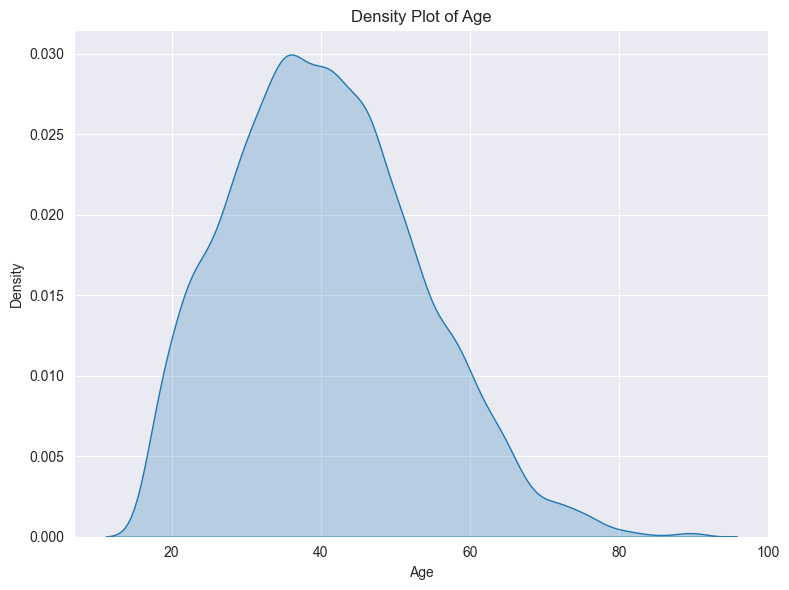

Age density plot saved to processed directory.


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create density plot for age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train, x='age', fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'age_density.png'))
plt.show()
print("Age density plot saved to processed directory.")

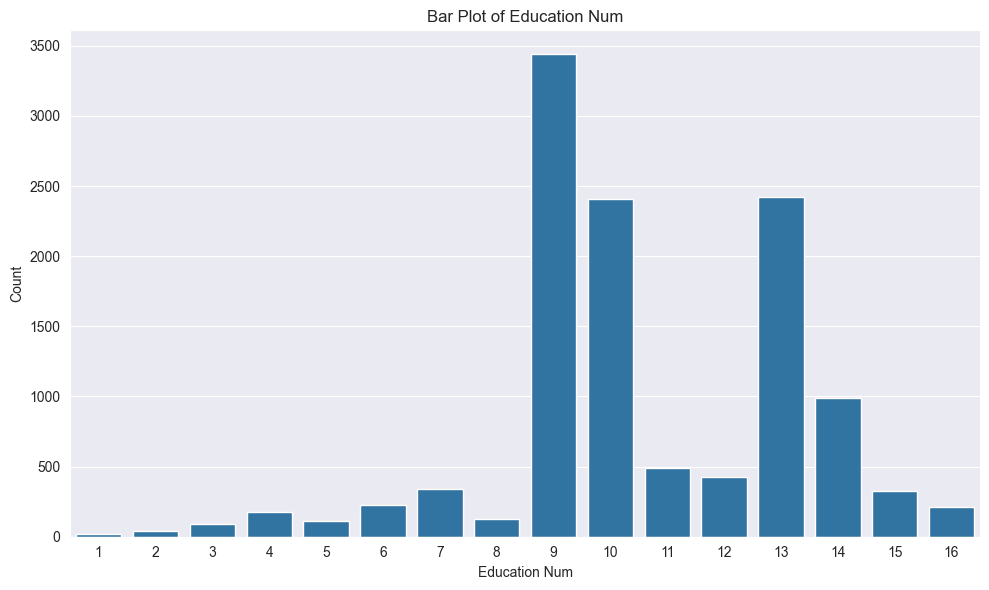

Education num bar plot saved to processed directory.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create bar plot for education_num
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='education_num')
plt.title('Bar Plot of Education Num')
plt.xlabel('Education Num')
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'education_num_bar.png'))
plt.show()
print("Education num bar plot saved to processed directory.")

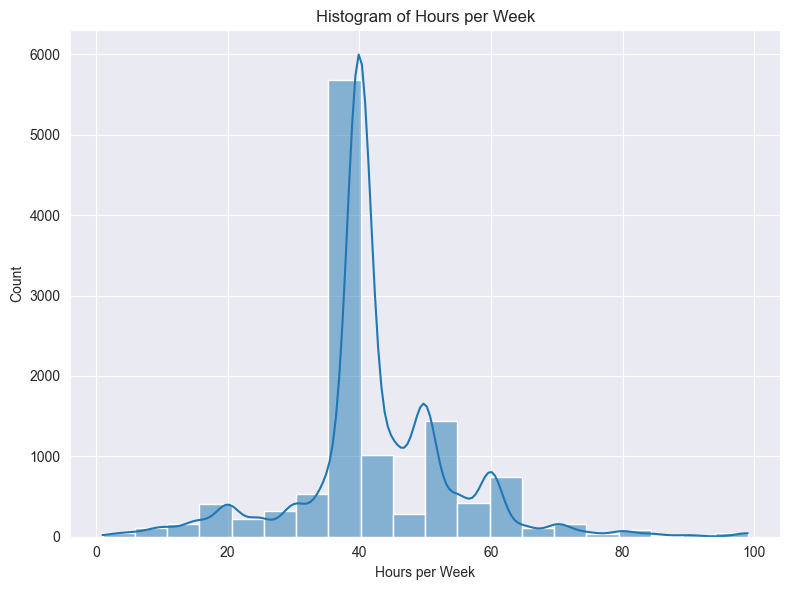

Hours per week histogram saved to processed directory.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create histogram for hours_per_week
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='hours_per_week', bins=20, kde=True)
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'hours_per_week_hist.png'))
plt.show()
print("Hours per week histogram saved to processed directory.")

In [20]:
#From the generated charts
#Age - Standard Scaler(Z-score scaler) = shows a near-normal curve, supporting StandardScaler
#education_num - MinMaxScaler = bounded skew justifies MinMaxScaler
#hours_per_week - RobustScaler = right skew and outliers validate RobustScaler

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load the datasets
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_test.csv'))

# Initialize scalers
scaler_age = StandardScaler()
scaler_edu = MinMaxScaler()
scaler_hours = RobustScaler()

# Define columns to scale
columns_to_scale = {'age': scaler_age, 'education_num': scaler_edu, 'hours_per_week': scaler_hours}

# Fit scalers on training data and transform both train and test
for column, scaler in columns_to_scale.items():
    # Fit on train data only
    scaler.fit(train_df[[column]])
    # Transform both train and test
    train_df[column] = scaler.transform(train_df[[column]])
    test_df[column] = scaler.transform(test_df[[column]])

# Verify shapes and dtypes
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set dtypes:\n", train_df.dtypes)

# Display sample scaled values for verification
print("\nSample scaled values (first 5 rows):")
print(train_df[['age', 'education_num', 'hours_per_week']].head())

# Save (corrected test file name)
train_df.to_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'), index=False)
test_df.to_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'), index=False)
print("Saved scaled datasets to processed directory.")

Training set shape: (11840, 78)
Test set shape: (2960, 78)

Training set dtypes:
 age                               float64
education_num                     float64
hours_per_week                    float64
income                              int64
workclass_Local-gov                 int64
                                   ...   
native_country_Thailand             int64
native_country_Trinadad&Tobago      int64
native_country_United-States        int64
native_country_Vietnam              int64
native_country_Yugoslavia           int64
Length: 78, dtype: object

Sample scaled values (first 5 rows):
        age  education_num  hours_per_week
0 -0.284563       0.800000             0.0
1 -1.390343       0.600000            -2.5
2  0.268326       0.733333             0.0
3  1.058169       0.866667             0.0
4 -1.390343       0.600000            -2.0
Saved scaled datasets to processed directory.


Model Training

XGBoost

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import os

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Initialize and train XGBoost model
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Feature importance (for viva explanation)
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
print("\nTop 5 Feature Importances:")
print(feature_importance.sort_values(by='importance', ascending=False).head())

Training Accuracy: 90.50675675675676
Test Accuracy: 86.14864864864865

Confusion Matrix:
[[1217  263]
 [ 147 1333]]

Top 5 Feature Importances:
                              feature  importance
10  marital_status_Married-civ-spouse    0.399521
1                       education_num    0.037140
21           occupation_Other-service    0.027042
5              workclass_Self-emp-inc    0.021931
18         occupation_Farming-fishing    0.020524


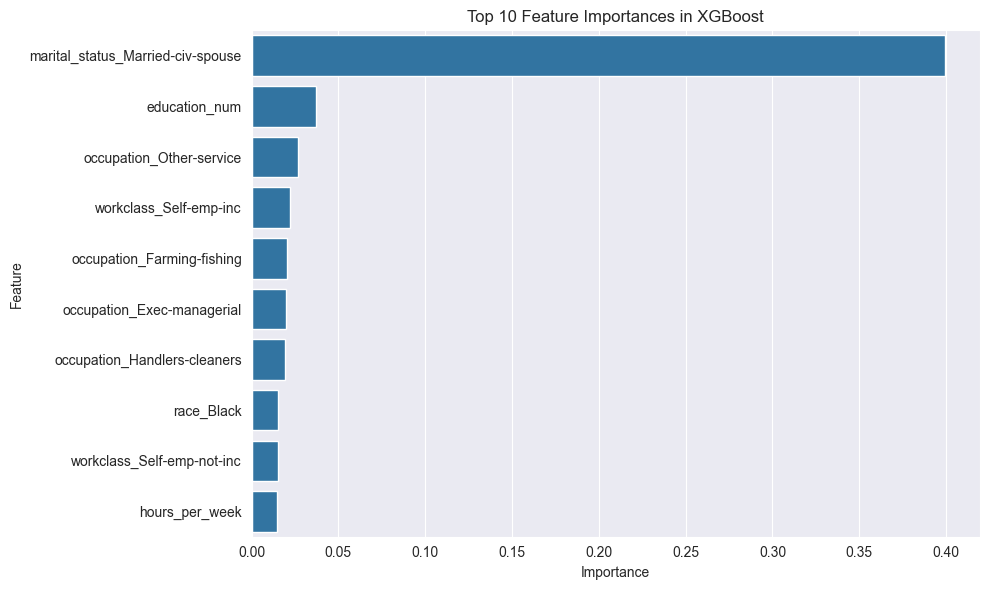

✅ XGBoost feature importance plot saved to processed directory.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xgboost as xgb

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train XGBoost
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
top_features = feature_importance.sort_values(by='importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 10 Feature Importances in XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'xgboost_feature_importance.png'))
plt.show()
print("✅ XGBoost feature importance plot saved to processed directory.")

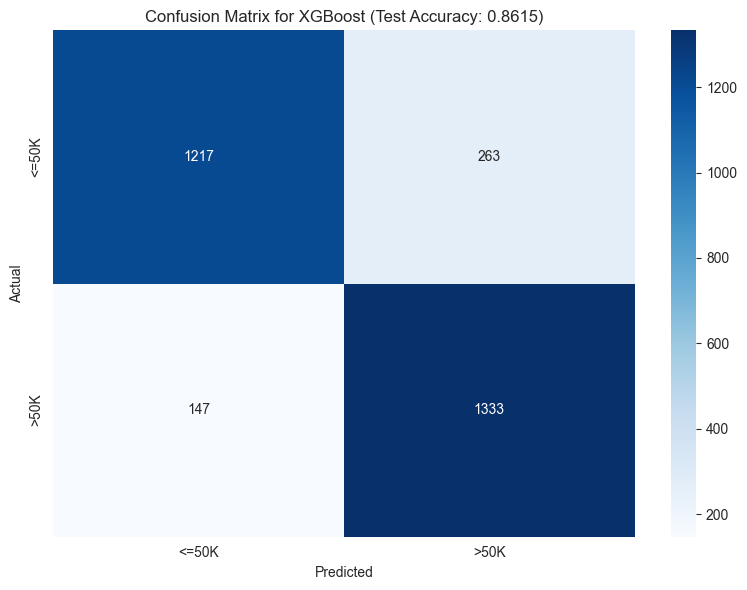

✅ XGBoost confusion matrix heatmap saved to processed directory.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train XGBoost
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for XGBoost (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'xgboost_confusion_matrix.png'))
plt.show()
print("✅ XGBoost confusion matrix heatmap saved to processed directory.")

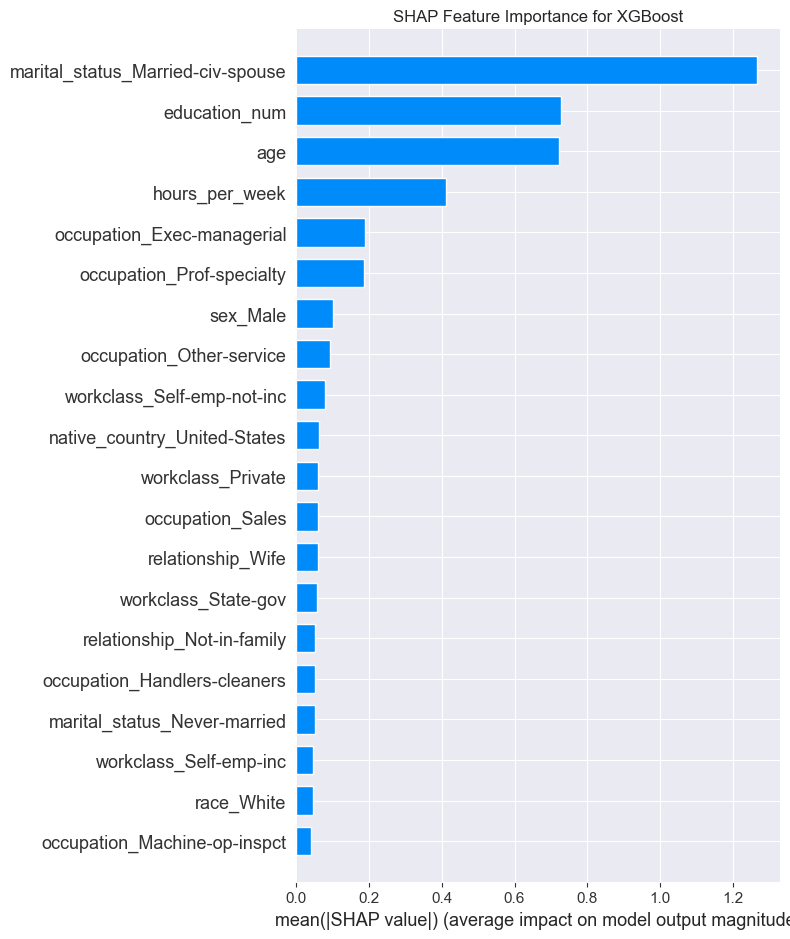

✅ XGBoost SHAP summary plot saved to processed directory.


In [16]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import os
import xgboost as xgb

# Load the scaled training and test datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)

# Train XGBoost
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance for XGBoost')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'xgboost_shap_summary.png'))
plt.show()
print("✅ XGBoost SHAP summary plot saved to processed directory.")

Linear Regression

In [7]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Initialize and train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set (continuous values)
y_pred = model.predict(X_test)

# Threshold predictions to binary classes (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("Test Accuracy:", accuracy * 100)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 81.21621621621622

Confusion Matrix:
[[1114  366]
 [ 190 1290]]


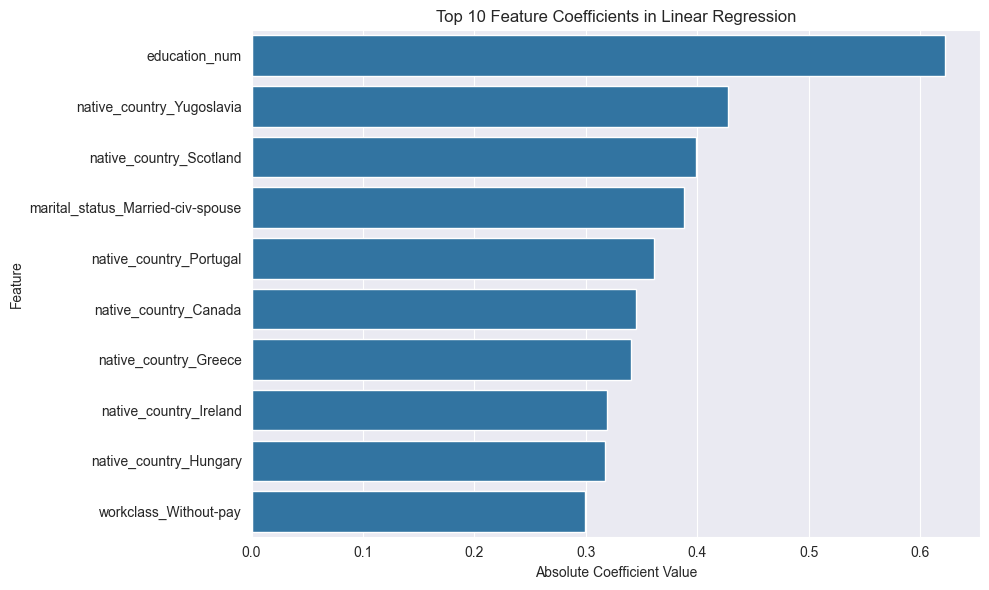

✅ Linear Regression coefficient plot saved to processed directory.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

# Load the scaled training dataset
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Create coefficient DataFrame (absolute values for ranking)
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': abs(model.coef_)})
top_coefs = coef_df.sort_values(by='coefficient', ascending=False).head(10)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=top_coefs, x='coefficient', y='feature')
plt.title('Top 10 Feature Coefficients in Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'linear_regression_coefficients.png'))
plt.show()
print("✅ Linear Regression coefficient plot saved to processed directory.")

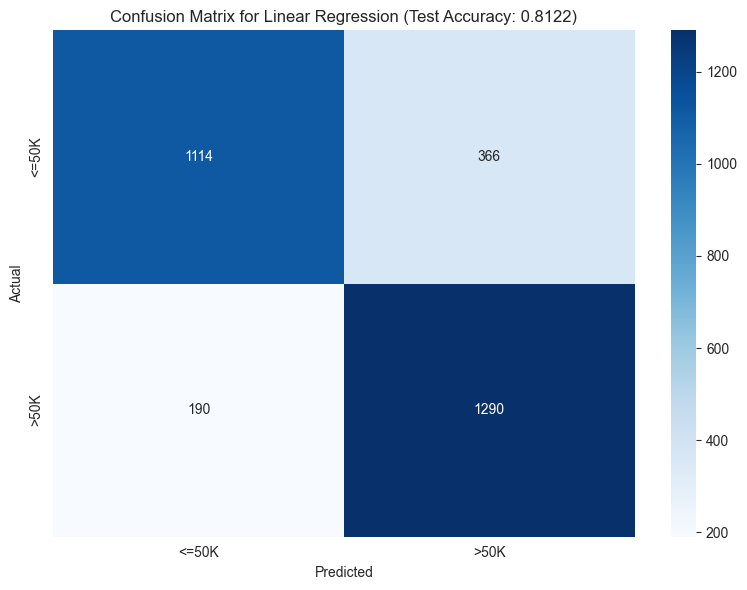

✅ Linear Regression confusion matrix heatmap saved to processed directory.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set and threshold
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for Linear Regression (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'linear_regression_confusion_matrix.png'))
plt.show()
print("✅ Linear Regression confusion matrix heatmap saved to processed directory.")

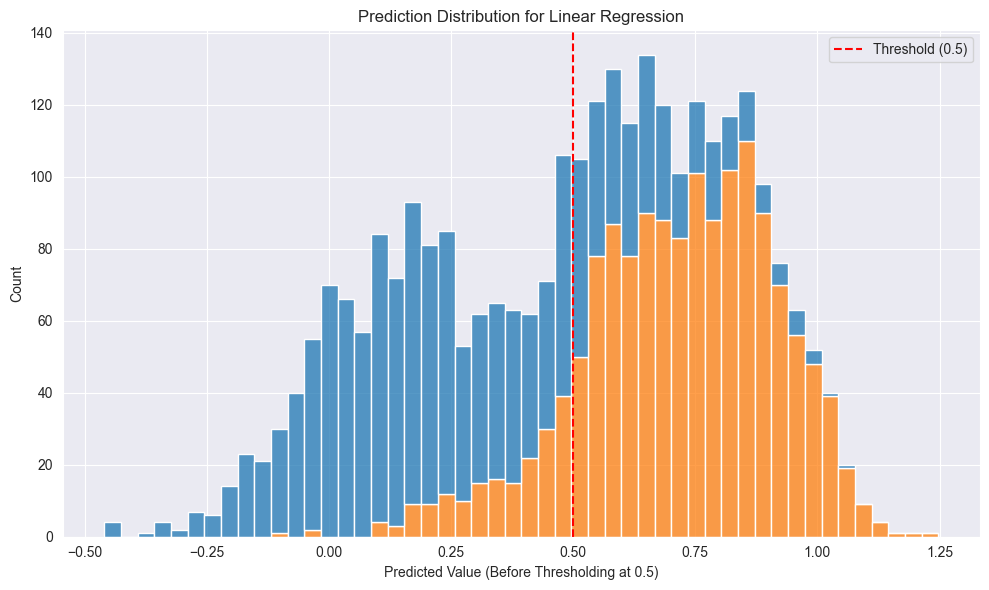

✅ Linear Regression prediction distribution plot saved to processed directory.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

# Load the scaled test dataset
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set (continuous probabilities)
y_pred = model.predict(X_test)

# Plot prediction distribution by true class
plt.figure(figsize=(10, 6))
sns.histplot(data={'Prediction': y_pred, 'True Class': y_test}, x='Prediction', hue='True Class', bins=50, multiple='stack')
plt.title('Prediction Distribution for Linear Regression')
plt.xlabel('Predicted Value (Before Thresholding at 0.5)')
plt.ylabel('Count')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'linear_regression_prediction_distribution.png'))
plt.show()
print("✅ Linear Regression prediction distribution plot saved to processed directory.")

Logistic Regression

In [8]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Initialize and train Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy * 100)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 81.04729729729729

Confusion Matrix:
[[1143  337]
 [ 224 1256]]


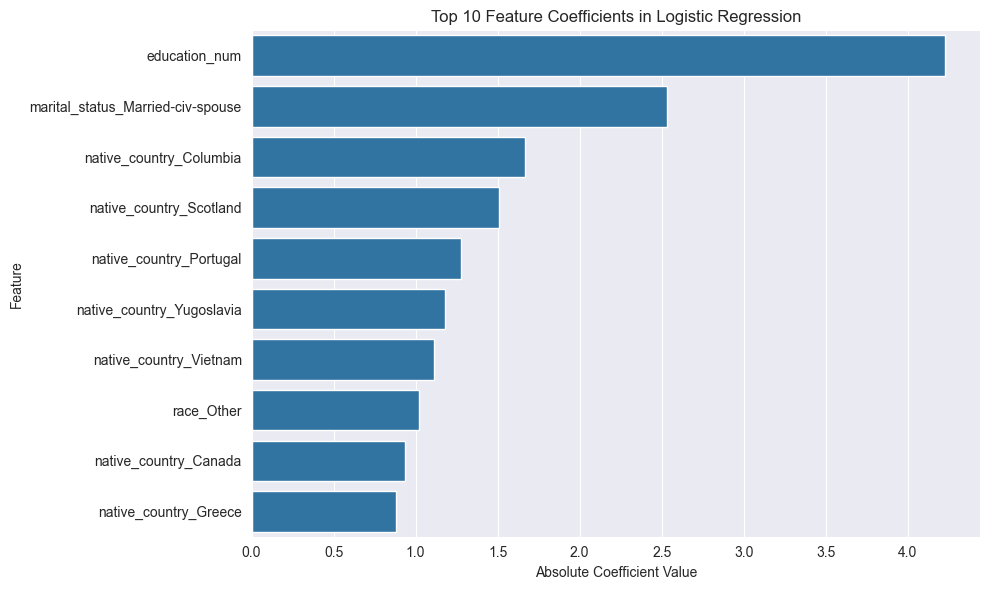

✅ Logistic Regression coefficient plot saved to processed directory.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression

# Load the scaled training dataset
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Create coefficient DataFrame (absolute values for ranking)
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': abs(model.coef_[0])})
top_coefs = coef_df.sort_values(by='coefficient', ascending=False).head(10)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=top_coefs, x='coefficient', y='feature')
plt.title('Top 10 Feature Coefficients in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'logistic_regression_coefficients.png'))
plt.show()
print("✅ Logistic Regression coefficient plot saved to processed directory.")

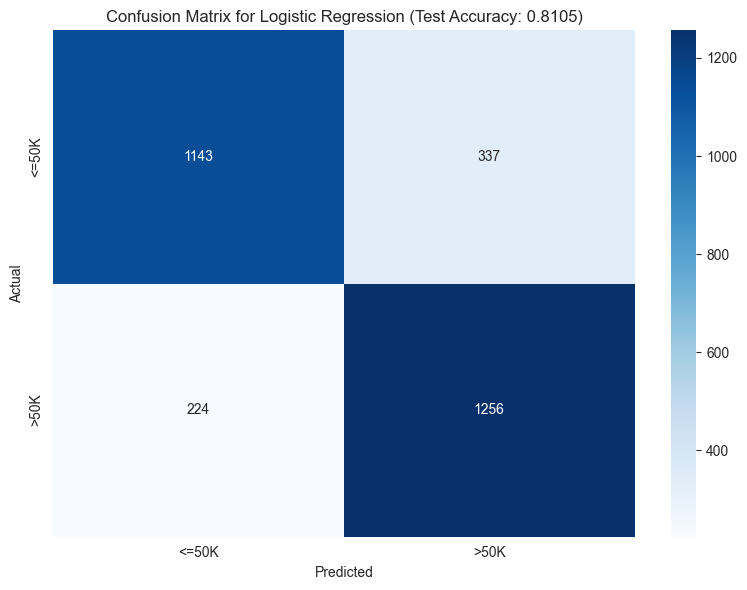

✅ Logistic Regression confusion matrix heatmap saved to processed directory.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for Logistic Regression (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'logistic_regression_confusion_matrix.png'))
plt.show()
print("✅ Logistic Regression confusion matrix heatmap saved to processed directory.")

Decision Tree

In [9]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Initialize and train Decision Tree
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy * 100)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 82.87162162162161

Confusion Matrix:
[[1160  320]
 [ 187 1293]]


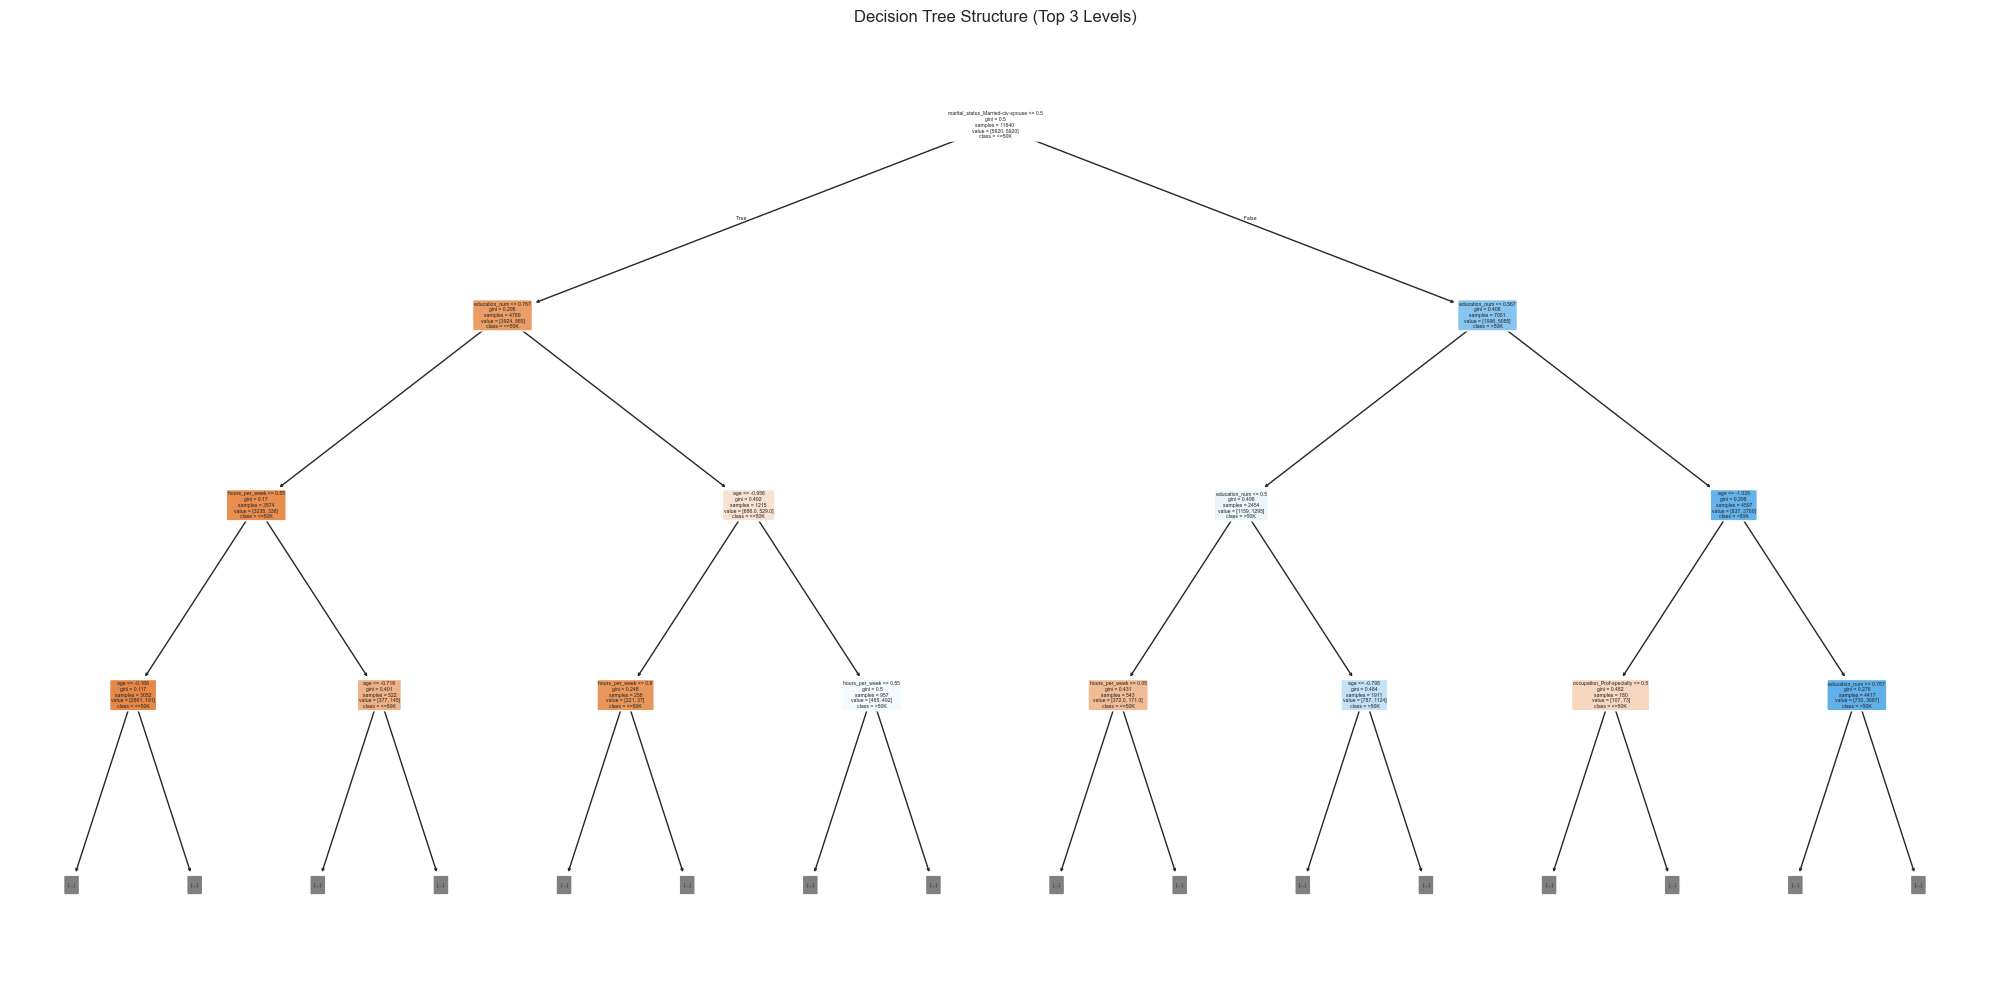

✅ Decision tree structure plot saved to processed directory.


In [10]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Plot partial tree (limit to depth 3 for readability)
plt.figure(figsize=(20, 10))
plot_tree(model, max_depth=3, feature_names=X_train.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True)
plt.title('Decision Tree Structure (Top 3 Levels)')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'decision_tree_structure.png'))
plt.show()
print("✅ Decision tree structure plot saved to processed directory.")

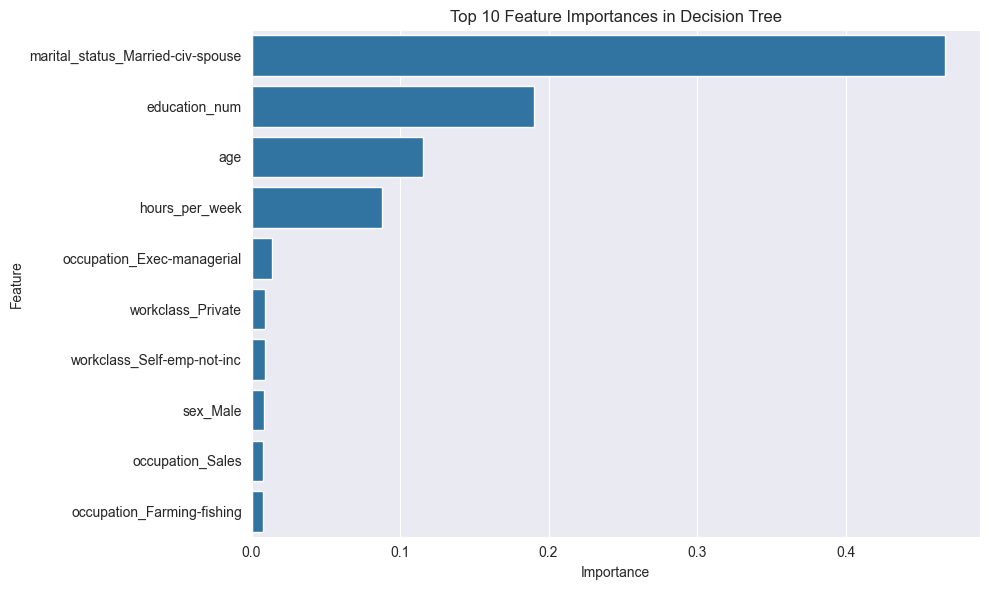

✅ Feature importance plot saved to processed directory.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
top_features = feature_importance.sort_values(by='importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'decision_tree_feature_importance.png'))
plt.show()
print("✅ Feature importance plot saved to processed directory.")

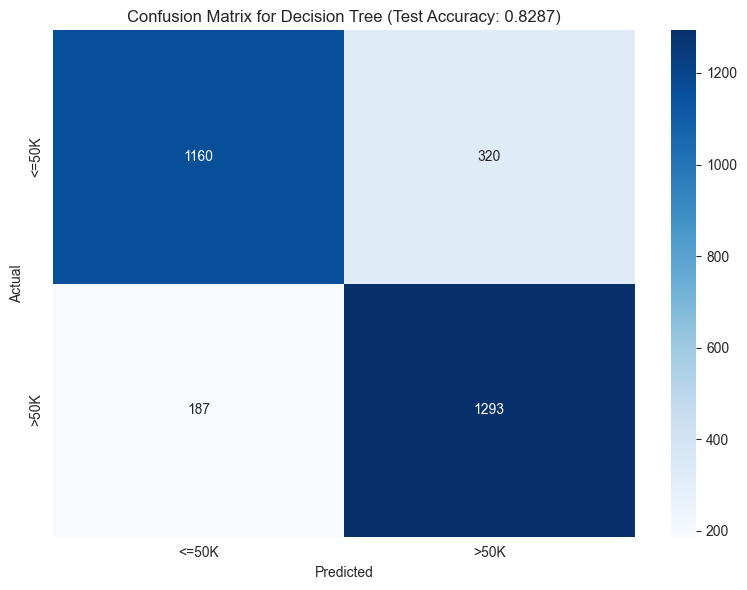

✅ Confusion matrix heatmap saved to processed directory.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for Decision Tree (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'decision_tree_confusion_matrix.png'))
plt.show()
print("✅ Confusion matrix heatmap saved to processed directory.")

Random Forest

In [4]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Loading the dataset
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

#Seprating the features and the target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

#Initializing and training Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth= 10,random_state=42)
model.fit(X_train, y_train)

#Predicting on the test set
y_pred = model.predict(X_test)

#Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test accuracy: ", accuracy * 100)
print("\nConfusion Matrix: ")
print(conf_matrix)

Test accuracy:  82.26351351351352

Confusion Matrix: 
[[1097  383]
 [ 142 1338]]


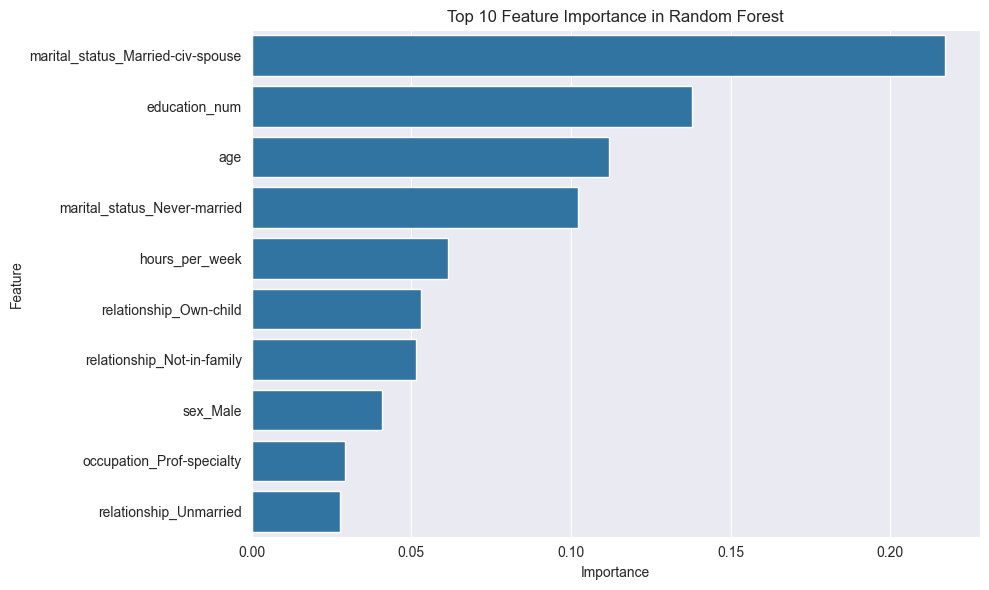

✅ Random Forest feature importance plot saved to processed directory.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier

# Load the scaled training dataset
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
top_features = feature_importance.sort_values(by='importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 10 Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'random_forest_feature_importance.png'))
plt.show()
print("✅ Random Forest feature importance plot saved to processed directory.")

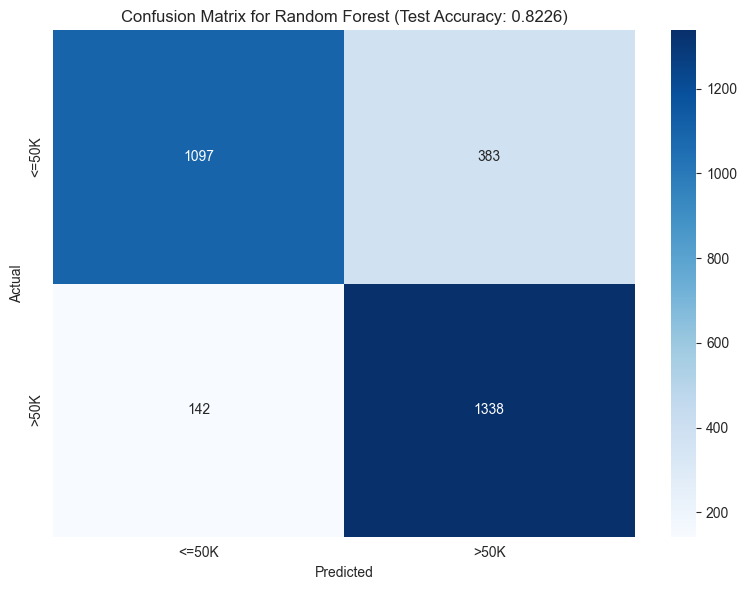

✅ Random Forest confusion matrix heatmap saved to processed directory.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for Random Forest (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'random_forest_confusion_matrix.png'))
plt.show()
print("✅ Random Forest confusion matrix heatmap saved to processed directory.")

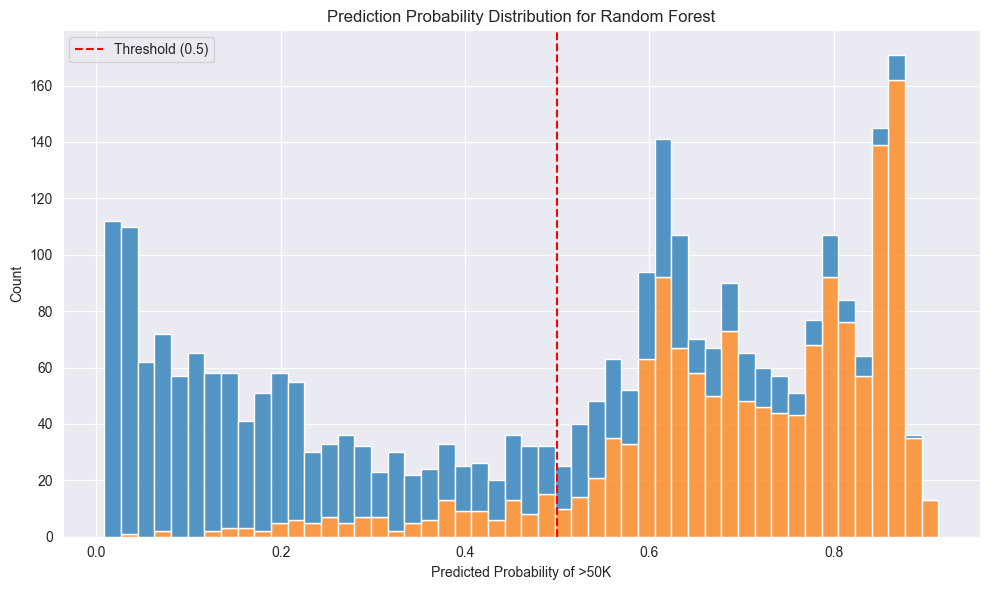

✅ Random Forest prediction distribution plot saved to processed directory.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities on test set (probability of class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot prediction probability distribution by true class
plt.figure(figsize=(10, 6))
sns.histplot(data={'Prediction Probability': y_pred_prob, 'True Class': y_test}, x='Prediction Probability', hue='True Class', bins=50, multiple='stack')
plt.title('Prediction Probability Distribution for Random Forest')
plt.xlabel('Predicted Probability of >50K')
plt.ylabel('Count')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'random_forest_prediction_distribution.png'))
plt.show()
print("✅ Random Forest prediction distribution plot saved to processed directory.")

Support Vector Machines

In [8]:
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))


# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Initialize and train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy * 100)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 80.77702702702703

Confusion Matrix:
[[1087  393]
 [ 176 1304]]


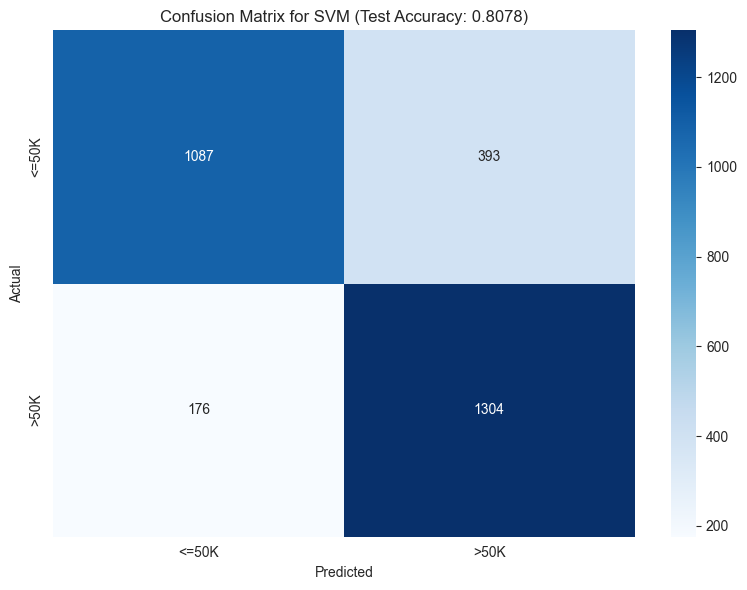

✅ SVM confusion matrix heatmap saved to processed directory.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train SVM
model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for SVM (Test Accuracy: {accuracy:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'svm_confusion_matrix.png'))
plt.show()
print("✅ SVM confusion matrix heatmap saved to processed directory.")

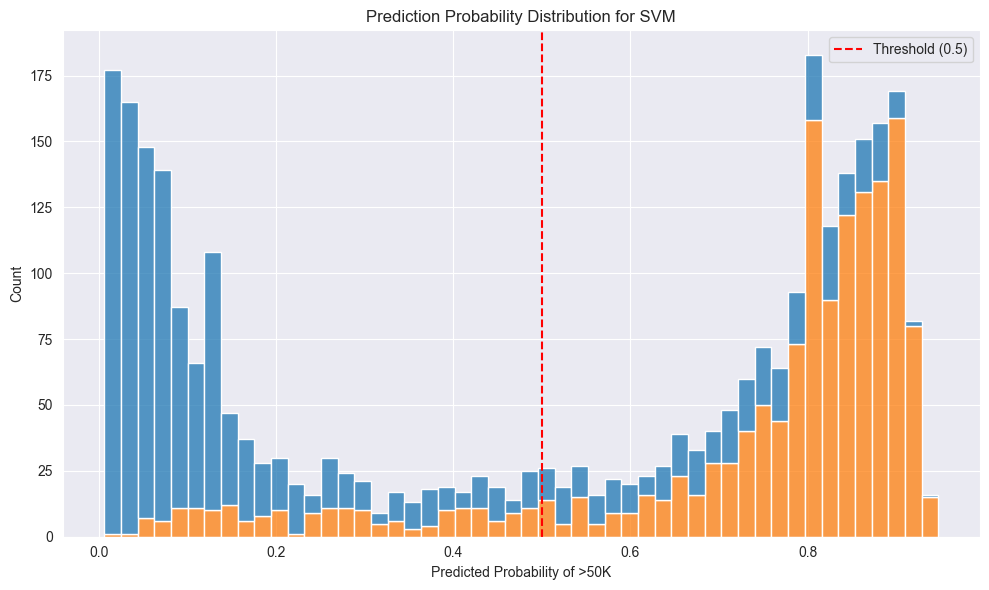

✅ SVM prediction distribution plot saved to processed directory.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train SVM
model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
model.fit(X_train, y_train)

# Predict probabilities on test set (probability of class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot prediction probability distribution by true class
plt.figure(figsize=(10, 6))
sns.histplot(data={'Prediction Probability': y_pred_prob, 'True Class': y_test}, x='Prediction Probability', hue='True Class', bins=50, multiple='stack')
plt.title('Prediction Probability Distribution for SVM')
plt.xlabel('Predicted Probability of >50K')
plt.ylabel('Count')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.tight_layout()

# Save the plot
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'svm_prediction_distribution.png'))
plt.show()
print("✅ SVM prediction distribution plot saved to processed directory.")

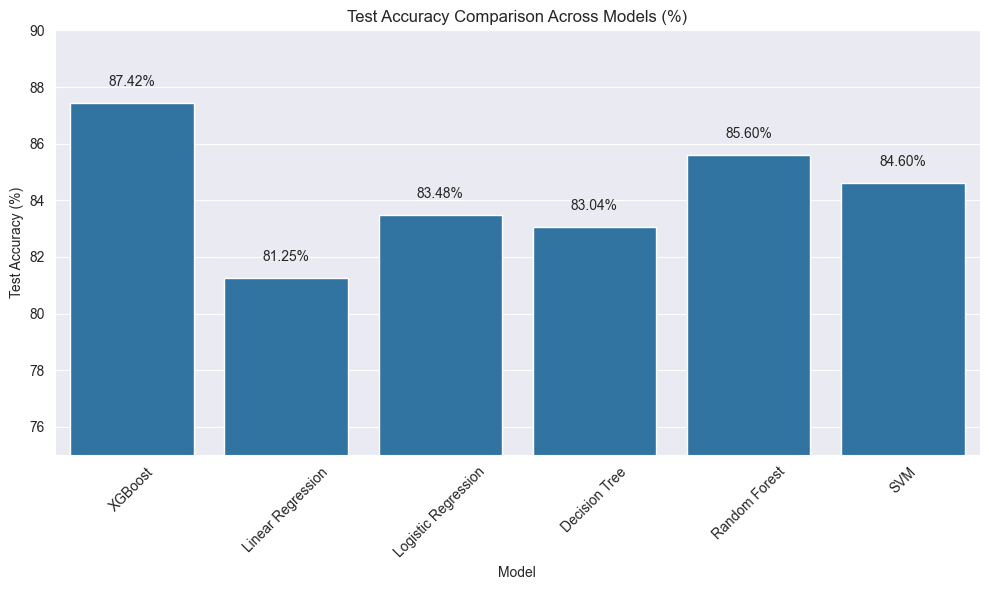

✅ Model accuracy comparison plot saved to eda_visualizations directory.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure the visualization directory exists
visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
os.makedirs(visualization_dir, exist_ok=True)

# Define the accuracy data in percentages
models = ['XGBoost', 'Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [87.42, 81.25, 83.48, 83.04, 85.60, 84.60]

# Create DataFrame for plotting
accuracy_df = pd.DataFrame({'Model': models, 'Test Accuracy (%)': accuracies})

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Test Accuracy (%)')
plt.title('Test Accuracy Comparison Across Models (%)')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.ylim(75, 90)  # Set y-axis limits for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(visualization_dir, 'model_accuracy_comparison_percent.png'))
plt.show()
print("✅ Model accuracy comparison plot saved to eda_visualizations directory.")

Hyper Parameter Tuning

In [13]:
import pandas as pd
import os
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Define parameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost
model = xgb.XGBClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy with Best Parameters:", accuracy)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.8}
Test Accuracy with Best Parameters: 0.9212837837837838


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.82      0.86      1480
        >50K       0.84      0.90      0.87      1480

    accuracy                           0.86      2960
   macro avg       0.86      0.86      0.86      2960
weighted avg       0.86      0.86      0.86      2960



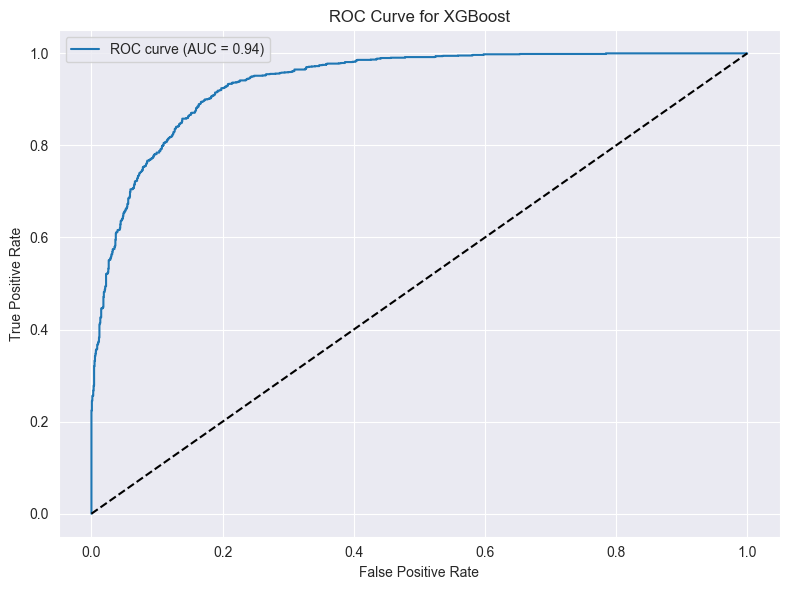

✅ ROC curve saved to processed directory.


In [14]:
import pandas as pd
import os
import xgboost as xgb
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Train XGBoost with best parameters (update with results from Step 1)
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()

visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'xgboost_roc_curve.png'))
plt.show()
print("✅ ROC curve saved to processed directory.")

<Figure size 1000x600 with 0 Axes>

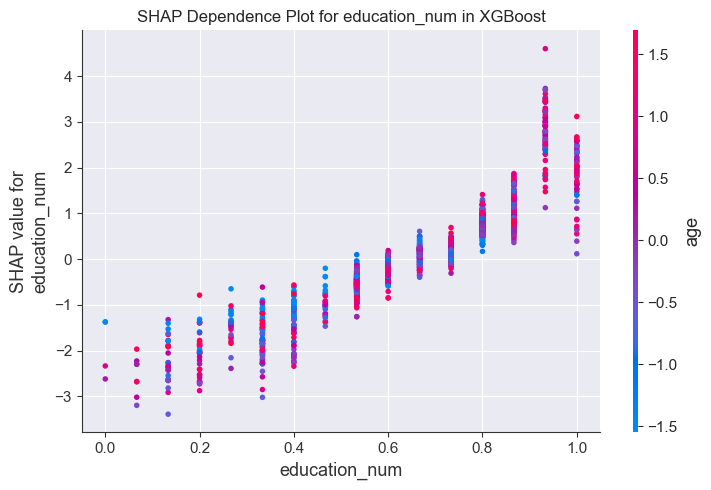

✅ SHAP dependence plot saved to processed directory.


In [15]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import os
import xgboost as xgb

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)

# Train XGBoost with best parameters (update with results from Step 1)
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP dependence plot for top feature (e.g., 'education_num')
plt.figure(figsize=(10, 6))
shap.dependence_plot('education_num', shap_values, X_test, show=False)
plt.title('SHAP Dependence Plot for education_num in XGBoost')
plt.tight_layout()

visualization_dir = r"E:\AIML_Project\results\eda_visualizations"
plt.savefig(os.path.join(visualization_dir, 'xgboost_shap_dependence_education_num.png'))
plt.show()
print("✅ SHAP dependence plot saved to processed directory.")

In [16]:
import pandas as pd
import os
import xgboost as xgb
import joblib

# Load the scaled datasets
processed_dir = r"E:\AIML_Project\results\outputs"
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'))

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Train XGBoost with best parameters (update with results from Step 1)
model = xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Save the model
model_path = os.path.join(processed_dir, 'xgboost_model.joblib')
joblib.dump(model, model_path)
print(f"✅ Model saved to {model_path}")

# Example prediction function
def predict_income(new_data, model_path):
    model = joblib.load(model_path)
    predictions = model.predict(new_data)
    return ['>50K' if pred == 1 else '<=50K' for pred in predictions]

# Test prediction on a sample
sample_data = test_df.drop('income', axis=1).iloc[:5]
predictions = predict_income(sample_data, model_path)
print("Sample Predictions:", predictions)

✅ Model saved to E:\AIML_Project\results\outputs\xgboost_model.joblib
Sample Predictions: ['>50K', '<=50K', '>50K', '>50K', '>50K']
